In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import scipy.stats as sp
import seaborn as sns
from scipy.stats.stats import pearsonr
from datetime import datetime
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [22]:
data_er=pd.read_excel("Data_COMP5212project.xlsx",sheet_name="ER",index_col="Date")
print(data_er.head(5))
#data_eurusd=data_er["EUR_USD"]
#data_eurusd=data_er["EUR_USD"]
#print(data_eurusd[:5])
#print(data_er.index[0])

            USD_CNY  USD_JPY  EUR_USD  USD_CAD  AUD_USD  USD_CHF  GBP_USD
Date                                                                     
1999-01-01   8.2778   116.32   1.1366   1.5105   0.6305   1.4160   1.6458
1999-02-01   8.2790   119.17   1.1025   1.5080   0.6188   1.4463   1.6030
1999-03-01   8.2800   118.86   1.0770   1.5080   0.6347   1.4825   1.6107
1999-04-01   8.2790   119.49   1.0570   1.4565   0.6615   1.5255   1.6095
1999-05-01   8.2784   121.52   1.0423   1.4739   0.6488   1.5272   1.6030


In [23]:
data_v=pd.read_excel("Data_COMP5212project.xlsx",sheet_name="Variables", index_col="Date")
print(data_v.head(5))
#print(data_v.index[0])
#print(data_v["EuroStoxx50"])

            Shanghai    SP500  Nikkei225  EuroStoxx50    SPTSX  SPASX200  \
Date                                                                       
1999-01-01   1134.67  1279.64   14499.25          NaN  6729.56    2781.7   
1999-02-01   1090.09  1238.33   14367.54          NaN  6312.69    2768.4   
1999-03-01   1158.05  1286.37   15836.59          NaN  6597.79    2867.0   
1999-04-01   1120.93  1335.18   16701.53          NaN  7014.70    3027.8   
1999-05-01   1279.33  1301.84   16111.65          NaN  6841.80    2831.9   

               SMI  FT100  GoldPrice  BrentOilFutures  ...  STINT_CHE  \
Date                                                   ...              
1999-01-01  7201.2    NaN      286.3            11.35  ...    1.27167   
1999-02-01  7063.8    NaN      287.5            10.88  ...    1.26167   
1999-03-01  7130.2    NaN      279.8            15.24  ...    1.24833   
1999-04-01  7335.5    NaN      286.8            16.57  ...    0.99333   
1999-05-01  6911.6    NaN    

In [24]:
df_all=data_er.join(data_v)

In [25]:
df_all.tail()

,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,Shanghai,SP500,Nikkei225,...,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,6.6927,104.64,1.1647,1.3317,0.7026,0.9167,1.2941,3224.53,3269.96,22977.13,...,-0.7666,0.05,NaN,0.79,0.040,0.0005,0.602857,0.82,-0.518,0.3058
2020-11-01,6.5789,104.27,1.1928,1.3000,0.7345,0.9090,1.3321,3391.76,3621.63,26433.62,...,-0.7840,0.04,NaN,0.87,0.030,-0.0553,0.688500,0.87,-0.509,0.3836
2020-12-01,6.5250,103.24,1.2213,1.2730,0.7694,0.8851,1.3673,3473.07,3756.07,27444.17,...,-0.7638,0.03,NaN,0.93,0.020,-0.0915,0.730952,0.98,-0.525,0.3224
2021-01-01,6.4250,104.68,1.2136,1.2777,0.7642,0.8903,1.3702,3483.07,3714.24,27663.39,...,-0.7600,0.03,NaN,1.08,0.055,-0.0636,0.805500,1.05,-0.450,0.3672
2021-02-01,6.4730,106.58,1.2074,1.2739,0.7705,0.9082,1.3932,3509.08,3811.15,28966.01,...,-0.7500,0.05,NaN,1.26,0.150,0.0668,1.099474,1.32,-0.230,NaN


In [26]:
results = smf.ols('EUR_USD ~  SP500.diff(1) + EuroStoxx50.diff(1) + GoldPrice.diff(1) + BrentOilFutures.diff(1) + CPI_USA.diff(1) + CPI_EU.diff(1) + STINT_USA + STINT_EA19 + LTINT_USA + LTINT_EA19', data=df_all).fit()

In [27]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                EUR_USD   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     41.09
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           5.80e-43
Time:                        22:25:31   Log-Likelihood:                 259.27
No. Observations:                 208   AIC:                            -496.5
Df Residuals:                     197   BIC:                            -459.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

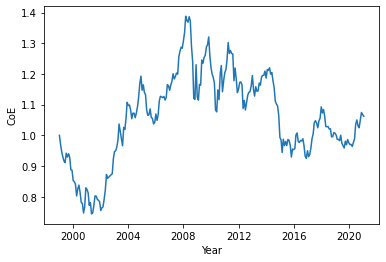

In [28]:
plt.plot(df_all["EUR_USD"]/df_all["EUR_USD"][0])
plt.xlabel('Year')
plt.ylabel('CoE')
plt.show()
#plt.plot(df_all["SP500"]/df_all["SP500"][0])
#plt.plot(df_all["EuroStoxx50"]/df_all["EuroStoxx50"][0])
#plt.plot(df_all["BrentOilFutures"]/df_all["BrentOilFutures"][0])
#plt.plot(df_all["CPI_USA"]/df_all["CPI_USA"][0])
#plt.plot(df_all["GoldPrice"]/df_all["GoldPrice"][0])

In [29]:
results = smf.ols('EUR_USD ~  SP500 + EuroStoxx50 + GoldPrice + BrentOilFutures + CPI_USA + CPI_EU + STINT_USA + STINT_EA19 + LTINT_USA + LTINT_EA19', data=df_all).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                EUR_USD   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     93.66
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           1.80e-69
Time:                        22:25:33   Log-Likelihood:                 325.41
No. Observations:                 209   AIC:                            -628.8
Df Residuals:                     198   BIC:                            -592.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2019      0.194     

In [30]:
df_usdeu=df_all[['EUR_USD', 'SP500', 'EuroStoxx50','GoldPrice', 'BrentOilFutures', 'CPI_USA', 'CPI_EU', 'STINT_USA', 'STINT_EA19', 'LTINT_USA', 'LTINT_EA19']]
df_usdeu.tail()

,EUR_USD,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19
Date,,,,,,,,,,,
2020-10-01,1.1647,3269.96,2958.21,1892.4,37.46,109.8605,105.92,0.12,-0.5091,0.79,0.0005
2020-11-01,1.1928,3621.63,3492.54,1784.8,47.59,109.7934,105.63,0.16,-0.5209,0.87,-0.0553
2020-12-01,1.2213,3756.07,3552.64,1899.6,51.80,109.8968,105.97,0.17,-0.5381,0.93,-0.0915
2021-01-01,1.2136,3714.24,3481.44,1850.3,55.88,110.3642,106.27,0.14,-0.5472,1.08,-0.0636
2021-02-01,1.2074,3811.15,3636.44,1728.8,66.13,NaN,NaN,0.11,-0.5417,1.26,0.0668


In [31]:
df_usdeu.dropna(inplace=True)
usdeu_y=df_usdeu['EUR_USD']
usdeu_x=df_usdeu.drop('EUR_USD', axis='columns')

# Series.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
test_size=0.4
usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = test_size, shuffle=False )
#sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

print(len(usdeu_x_train))
print(len(usdeu_x_test))
print(len(usdeu_y_train))
print(len(usdeu_y_test))
#usdeu_x_train.to_excel("output1.xlsx", sheet_name='usdeu_x_train')  
usdeu_x_train.tail()

125
84
125
84


C:\Users\yhmau\Anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19
Date,,,,,,,,,,
2013-09-01,1681.55,2893.15,1326.5,108.37,98.78996,99.85,0.11,0.2232,2.81,3.4070
2013-10-01,1756.54,3067.95,1323.6,108.84,98.53555,99.75,0.12,0.2258,2.62,3.1626
2013-11-01,1805.81,3086.64,1250.6,109.69,98.33430,99.65,0.12,0.2234,2.72,3.1712
2013-12-01,1848.36,3109.00,1201.9,110.80,98.32586,99.98,0.14,0.2735,2.90,3.3132
2014-01-01,1782.59,3013.96,1240.1,106.40,98.69166,99.05,0.12,0.2920,2.86,3.2124


SVR
[1.41675173 1.41281213 1.41791544 1.4144938  1.42096962 1.40444776
 1.40773549 1.40471159 1.38475088 1.39630686 1.40544733 1.43670767
 1.44282567 1.44546865 1.44001929 1.43670443 1.42574542 1.42360188
 1.40787475 1.38773681 1.41279867 1.40839251 1.38945608 1.37695603
 1.37914411 1.38126659 1.39101485 1.38557001 1.37107414 1.3873751
 1.38723788 1.38508239 1.39023062 1.37501611 1.39828733 1.39698683
 1.40586127 1.42180386 1.42721697 1.42506524 1.41053883 1.41148329
 1.41440218 1.42206911 1.42249391 1.41096472 1.40778293 1.40906739
 1.40188795 1.40115386 1.41574866 1.39769303 1.39035927 1.38969072
 1.36905414 1.36788688 1.36559254 1.35940848 1.36222157 1.37102491
 1.37889355 1.3777869  1.38192945 1.37773889 1.38974281 1.38767699
 1.3959478  1.39927032 1.39994833 1.39352838 1.39236235 1.39011457
 1.38579317 1.34599589 1.34802216 1.35642301 1.37566088 1.35871466
 1.34817571 1.35049665 1.33093586 1.3500525  1.345475   1.34302231]
Accuracy on training set: 0.41
Accuracy on test set: -9.14

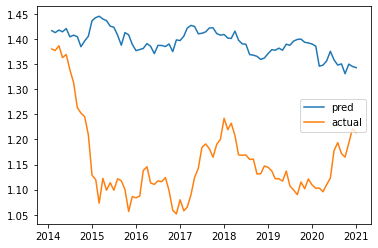

In [32]:
#### train OLS #### 

from sklearn                        import svm
from sklearn.svm                    import SVC

clf = svm.SVR()
clf.fit(usdeu_x_train, usdeu_y_train)
print("SVR")
print(clf.predict(usdeu_x_test))
print("Accuracy on training set: {:.2f}".format(clf.score(usdeu_x_train, usdeu_y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(usdeu_x_test, usdeu_y_test)))
pred_lin_0 = clf.predict(usdeu_x_test)
pred_lin_0 = pd.Series(pred_lin_0,index=usdeu_y_test.index)

#print(linReg.coef_)
#print(linReg.intercept_)
plt.plot(pred_lin_0)
plt.plot(usdeu_y_test)
plt.legend(["pred","actual"])
plt.show()

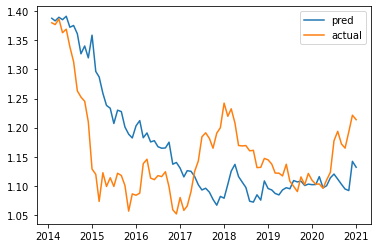

MAE: 0.0685419814577471
MSE: 0.00697506775124012
RMSE: 0.08351687105753017
R-squared:  -0.13825501012321562
Accuracy: 94.02 %.


In [34]:
#one-step ahead predictions for recursive linear regression
# y(t)= b*X(t-1)   X(t-1) includes exchange rates and other variables at time t-1


df_len=len(df_usdeu)
#print(df_len)
#print(len(usdeu_y))
start_pred_pos = int(df_len*(1-test_size))
#print(start_pred_pos)
lin_preds_1=[]
for i in range(start_pred_pos, df_len):
  #print(i)
  #linReg = LinearRegression().fit(df_usdeu[:i], usdeu_y[1:i+1])
  clf = svm.SVR()
  clf.fit(df_usdeu[:i], usdeu_y[1:i+1])

  #print(df_usdeu[:i])
  #print(len(df_usdeu[:i]))
  lin_pred = clf.predict(df_usdeu[i:i+1])
  #print("+1 ", df_usdeu[i:i+1])
  lin_preds_1.append(lin_pred[0])
lin_preds_1=pd.Series(lin_preds_1,index=usdeu_y_test.index)
#print(len(lin_preds_1))
#print(len(usdeu_y_test))
plt.plot(lin_preds_1)
plt.plot(usdeu_y_test)
plt.legend(["pred","actual"])
plt.show()
errors=lin_preds_1-usdeu_y_test
AE=abs(errors)

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, lin_preds_1))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, lin_preds_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, lin_preds_1)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, lin_preds_1)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (AE / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', np.round(accuracy, 2), '%.')

In [36]:
  #linReg = LinearRegression().fit(df_usdeu[0:208], usdeu_y[1:209])
  clf = svm.SVR()
  clf.fit(df_usdeu[0:208], usdeu_y[1:209])
    
  #print(df_usdeu[:i])
  #print(len(df_usdeu[:i]))
  lin_pred = clf.predict(df_usdeu[208:209])
  print("predicted ER on 2021-02-01:", lin_pred[0])
  print("actual ER on 2021-02-01: ",df_all[-1:]["EUR_USD"][0])


predicted ER on 2021-02-01: 1.1318194886892097
actual ER on 2021-02-01:  1.2074


MAE: 0.018982142857142857
MSE: 0.0005985915476190479
RMSE: 0.024466130622128376
R-squared:  0.9023163856761605
Accuracy: 98.36 %.


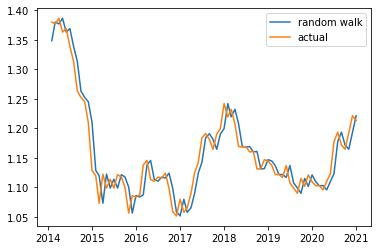

In [37]:
#random walk model without drift
eurusd_pred_rw = df_usdeu["EUR_USD"].shift(1)
errors_rw = eurusd_pred_rw[start_pred_pos:] - df_usdeu["EUR_USD"][start_pred_pos:]
plt.plot(eurusd_pred_rw[start_pred_pos:])
plt.plot(df_usdeu["EUR_USD"][start_pred_pos:])
plt.legend(["random walk","actual"]) 
#print(errors_rw)

AE_rw=abs(errors_rw)

print('MAE:', metrics.mean_absolute_error(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:]))
print('MSE:', metrics.mean_squared_error(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:])))
print ('R-squared: ',metrics.r2_score(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:])) 

# Calculate mean absolute percentage error (MAPE)
mape_rw = 100 * (AE_rw / df_usdeu["EUR_USD"][start_pred_pos:])
# Calculate and display accuracy
accuracy_rw = 100 - np.mean(mape_rw)
print('Accuracy:', np.round(accuracy_rw, 2), '%.')

In [38]:
#DM tests
from dm_test import dm_test
rt = dm_test(pd.to_numeric(usdeu_y_test),pd.to_numeric(eurusd_pred_rw[start_pred_pos:]),pd.to_numeric(lin_preds_1), h = 1, crit="MSE")
print(rt)
#p-vale<0.1 meaning that the linear predictions are statiscally different from those of random walk . 

dm_return(DM=-6.764955779065728, p_value=1.7461487431680904e-09)


In [39]:
Pred_GingUp=lin_preds_1>usdeu_y_test.shift(1)
actual_GoingUP=usdeu_y_test>usdeu_y_test.shift(1)
print("going_up accuracy: ",(Pred_GingUp==actual_GoingUP).mean())
#print(len(Pred_GingUp))
#print(len(lin_preds_1))
#print(usdeu_y_test.shift(1))
#print(usdeu_y_test)
#print(lin_preds_1)

going_up accuracy:  0.5119047619047619
